In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

In [197]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
df = pd.read_csv(url)

Use only the following columns:

'engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'

In [198]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

In [199]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


### Question 1
There's one column with missing values. What is it?

'engine_displacement'
'horsepower'
'vehicle_weight'
'model_year'

In [5]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [6]:
print(f"Answer missing value: {df.columns[1]}")

Answer missing value: horsepower


### Question 2
What's the median (50% percentile) for variable 'horsepower'?

49
99
149
199

In [7]:
med_v = df['horsepower'].median()
print(med_v)

149.0


### Prepare and split the datasetres

In [8]:
# Shuffle Dataset

n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [9]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [10]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [11]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [12]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [13]:
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270])

In [14]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)

In [17]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [18]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [19]:
len(y_train), len(y_val), len(y_test)

(5824, 1940, 1940)

### Question3:

In [40]:
# Building a linear_regression model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [26]:
# Getting the Features
df.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year',
       'fuel_efficiency_mpg'],
      dtype='object')

In [47]:
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

df_train[features].isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

### 3.1: Fill with 0

In [159]:
# Features
X_train = df_train[features].fillna(0).values
X_val = df_val[features].fillna(0).values

In [160]:
# Check Dimension
len(X_train), len(y_train), len(X_val), len(y_val)

(5824, 5824, 1940, 1940)

In [161]:
# training
w0, w = train_linear_regression(X_val, y_val)

In [162]:
y_pred = w0 + X_val.dot(w) # -> y = b + mx

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

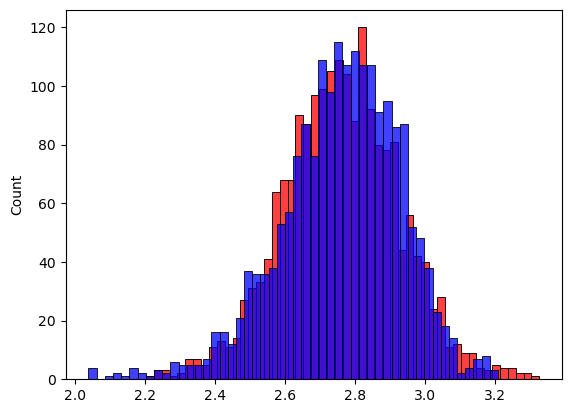

In [163]:
sns.histplot(y_pred, color='red', bins=50)
sns.histplot(y_val, color='blue', bins=50)

In [164]:
# Finding RMSE
def rmse(y, y_pred):
    error = y_pred - y
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [165]:
print(f"With 0 fill: {rmse(y_val, y_pred):.2f}")

With 0 fill: 0.04


In [166]:
len(y_pred), len(y_val)

(1940, 1940)

### 3.1: Fill with median of its columns

In [167]:
df_train.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [169]:
X_train = df_train[features].fillna(med_v).values
X_val = df_val[features].fillna(med_v).values

In [170]:
# X_train.isnull().sum() # -> Doesn't work on np arrays

In [171]:
w0, w = train_linear_regression(X_val, y_val)

In [172]:
y_pred = w0 + X_val.dot(w)

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

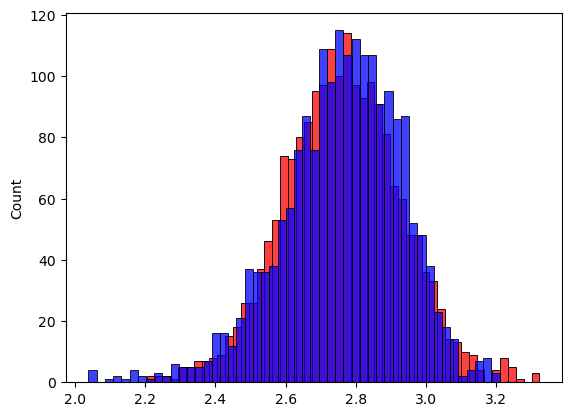

In [173]:
sns.histplot(y_pred, color='red', bins=50)
sns.histplot(y_val, color='blue', bins=50)

In [174]:
print(f"With median values fill: {rmse(y_val, y_pred):.2f}")

With median values fill: 0.04


In [175]:
len(y_val), len(y_pred)

(1940, 1940)

In [176]:
print(f"Question 3: The Same")

Question 3: The Same


### Regularization
#### Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100]

In [183]:
def train_linear_regression(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [187]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmses = list()
for r in r_values:
    print(r)
    w0, w = train_linear_regression(X_val, y_val, r)
    y_pred = w0 + X_val.dot(w)
    rmse_value = rmse(y_val, y_pred)
    rmses.append(rmse_value)

0
0.01
0.1
1
5
10
100


In [188]:
for r in rmses:
    print(f"{r:.2f}")

0.04
0.04
0.04
0.04
0.04
0.04
0.04


In [190]:
print(f"Question 4: {r_values[0]}")

Question 4: 0


### Questoin: 5
#### Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [201]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    
    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    
    X_train = df_train[features].fillna(0).values
    X_val = df_val[features].fillna(0).values
    
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

std_dev = np.std(rmse_scores)
print(f'Standard Deviation of RMSE scores: {round(std_dev, 3)}')

Standard Deviation of RMSE scores: 0.001


In [202]:
# Split the data with seed 9
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

y_full_train = np.log1p(df_full_train.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_full_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

X_full_train = df_full_train[features].fillna(0).values
X_test = df_test[features].fillna(0).values
w0, w = train_linear_regression(X_full_train, y_full_train, r=0.001)
y_pred = w0 + X_test.dot(w)

test_rmse = rmse(y_test, y_pred)
print(f'RMSE on the test dataset: {test_rmse:.3f}')

RMSE on the test dataset: 0.039
